## Mean and median imputation

Imputation is the act of replacing missing data with statistical estimates of the missing values. The goal of any imputation technique is to produce a **complete dataset** that can then be then used for machine learning.

Mean/median imputation consists of replacing all occurrences of missing values (NA) within a variable by the mean (if the variable has a Gaussian distribution) or median (if the variable has a skewed distribution).


### Assumptions

Mean/median imputation has the assumption that the data are missing completely at random (MCAR). If this is the case, we can think of replacing the NA with the  most frequent occurrence of the variable, which is the mean if the variable has a Gaussian distribution, or the median otherwise.

The rationale is to replace the population of missing values with the most frequent value, since this is the most likely occurrence.

### Advantages

- Easy to implement
- Fast way of obtaining complete datasets

### Limitations

- Distortion of original variance
- Distortion of covariance with remaining variables within the dataset

When replacing NA with the mean or median, the variance of the variable will be distorted if the number of NA is big respect to the total number of observations (since the imputed values do not differ from the mean or from each other). Therefore leading to underestimation of the variance.

In addition, estimates of covariance and correlations with other variables in the dataset may also be affected.  This is because we may be destroying intrinsic correlations since the mean/median that now replace NA will not preserve the relation with the remaining variables.


### Final note
Replacement of NA with mean/median is widely used in the data science community and in various data science competitions. See for example the winning solution of the KDD 2009 cup: "Winning the KDD Cup Orange Challenge with Ensemble Selection" (http://www.mtome.com/Publications/CiML/CiML-v3-book.pdf).

Typically, mean/median imputation is done together with adding a variable to capture those observations where the data was missing (see lecture "Creating a new variable with the missing data"), thus covering 2 angles: if the data was missing completely at random, this would be contemplated by the mean imputation, and if it wasn't this would be captured by the additional variable.

In addition, both methods are extremely straight forward to implement, and therefore are a top choice in data science competitions.

===============================================================================

## Real Life example: 

### Predicting Survival on the Titanic: understanding society behaviour and beliefs

Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Interestingly, by analysing the probability of survival based on few attributes like gender, age, and social status, we can make very accurate predictions on which passengers would survive. Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about the society priorities and privileges at the time.

### Predicting Sale Price of Houses

The problem at hand aims to predict the final sale price of homes based on different explanatory variables describing aspects of residential homes. Predicting house prices is useful to identify fruitful investments, or to determine whether the price advertised for a house is over or underestimated, before making a buying judgment.

=====================================================================================

In the following cells, I will demonstrate mean/median imputation using the Titanic and House Price datasets from Kaggle.

If you haven't downloaded the datasets yet, in the lecture "Guide to setting up your computer" in section 1, you can find the details on how to do so.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
% matplotlib inline

# for regression problems
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# for classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# to split and standarize the datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# to evaluate regression models
from sklearn.metrics import mean_squared_error

# to evaluate classification models
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

## Titanic

In [2]:
# load the Titanic Dataset with a few variables for demonstration

data = pd.read_csv('titanic.csv', usecols = ['Age', 'Fare','Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
# let's look at the percentage of NA

data.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

### Imputation important

Imputation should be done over the training set, and then propagated to the test set. This means that the mean/median to be used to fill missing values both in train and test set, should be extracted from the train set only. And this is to avoid overfitting.

In [4]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data, data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 3), (268, 3))

In [5]:
# let's make a function to create 2 variables from Age:
# one filling NA with median, and another one filling NA with zeroes

def impute_na(df, variable, median):
    df[variable+'_median'] = df[variable].fillna(median)
    df[variable+'_zero'] = df[variable].fillna(0) 

In [6]:
median = X_train.Age.median()
median

29.0

In [7]:
impute_na(X_train, 'Age', median)
X_train.head(15)

,Survived,Age,Fare,Age_median,Age_zero
857,1,51.0,26.5500,51.0,51.0
52,1,49.0,76.7292,49.0,49.0
386,0,1.0,46.9000,1.0,1.0
124,0,54.0,77.2875,54.0,54.0
578,0,NaN,14.4583,29.0,0.0
549,1,8.0,36.7500,8.0,8.0
118,0,24.0,247.5208,24.0,24.0
12,0,20.0,8.0500,20.0,20.0
157,0,30.0,8.0500,30.0,30.0
127,1,24.0,7.1417,24.0,24.0


In [8]:
impute_na(X_test, 'Age', median)

#### Mean/median imputation alters the variance of the original distribution of the variable

In [9]:
# we can see a change in the variance after imputation

print('Original Variance: ', X_train['Age'].std())
print('Variance after median imputation: ', X_train['Age_median'].std())

Original Variance:  14.506993804588443
Variance after median imputation:  13.024746215318798


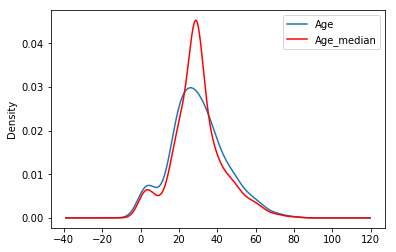

In [10]:
# we can see that the distribution has changed slightly with now more values accumulating towards the median
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['Age'].plot(kind='kde', ax=ax)
X_train.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

As mentioned above, the median imputation distorts the original distribution of the variable Age. The transformed variable shows more values around the median value.

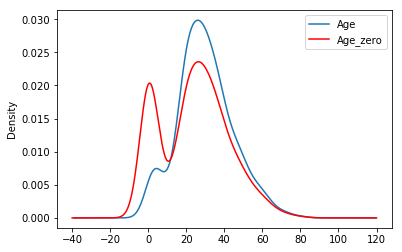

In [11]:
# filling NA with zeroes creates a peak of population around 0, as expected
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['Age'].plot(kind='kde', ax=ax)
X_train.Age_zero.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Filling NA with 0s also distorts the distribution of the original variable, generating an accumulation of values around 0. We will see in the next lecture a method of NA imputation that preserves variable distribution.

### Machine learning model performance on different imputation methods

#### Logistic Regression

In [12]:
# Let's compare the performance of Logistic Regression using Age filled with zeros or alternatively the median

# model on NA imputed with zeroes
logit = LogisticRegression(random_state=44, C=1000) # c big to avoid regularization
logit.fit(X_train[['Age_zero', 'Fare']], y_train)
print('Train set zero imputation')
pred = logit.predict_proba(X_train[['Age_zero', 'Fare']])
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set zero imputation')
pred = logit.predict_proba(X_test[['Age_zero', 'Fare']])
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
print()

# model on NA imputed with median
logit = LogisticRegression(random_state=44, C=1000) # c big to avoid regularization
logit.fit(X_train[['Age_median', 'Fare']], y_train)
print('Train set median imputation')
pred = logit.predict_proba(X_train[['Age_median', 'Fare']])
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set median imputation')
pred = logit.predict_proba(X_test[['Age_median', 'Fare']])
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Train set zero imputation
Logistic Regression roc-auc: 0.6863462831608859
Test set zero imputation
Logistic Regression roc-auc: 0.7137499999999999

Train set median imputation
Logistic Regression roc-auc: 0.6795188824537428
Test set median imputation
Logistic Regression roc-auc: 0.7244940476190476


We see that median imputation leads to better performance of the logistic regression. Why?

In [13]:
print('Average total survival:', X_train.Survived.mean())

Average total survival: 0.3884430176565008


In [14]:
print('Average real survival of children: ', X_train[X_train.Age<15].Survived.mean())
print('Average survival of children when using Age imputed with zeroes: ', X_train[X_train.Age_zero<15].Survived.mean())
print('Average survival of children when using Age imputed with median: ', X_train[X_train.Age_median<15].Survived.mean())

Average real survival of children:  0.5740740740740741
Average survival of children when using Age imputed with zeroes:  0.38857142857142857
Average survival of children when using Age imputed with median:  0.5740740740740741


Children were more likely to survive the catastrophe (0.57 for children vs 0.38 for the entire Titanic). Thus, smaller values of Age are a good indicator of survival.

When we replace NA with zeroes, we are masking the predictive power of Age. After zero imputation it looks like children did not have a greater chance of survival, and therefore the model loses predictive power.

On the other hand, replacing NA with the median, preserves the predictive power of the variable Age, as smaller Age values will favour survival.

#### Support Vector Machine

In [15]:
# Let's compare the performance of SVM using Age filled with zeros or alternatively the median

SVM_model = SVC(random_state=44, probability=True, max_iter=-1, kernel='linear',)
SVM_model.fit(X_train[['Age_zero', 'Fare']], y_train)
print('Train set zero imputation')
pred = SVM_model.predict_proba(X_train[['Age_zero', 'Fare']])
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set zero imputation')
pred = SVM_model.predict_proba(X_test[['Age_zero', 'Fare']])
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
print()
SVM_model = SVC(random_state=44, probability=True,  max_iter=-1, kernel='linear')
SVM_model.fit(X_train[['Age_median', 'Fare']], y_train)
print('Train set median imputation')
pred = SVM_model.predict_proba(X_train[['Age_median', 'Fare']])
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set median imputation')
pred = SVM_model.predict_proba(X_test[['Age_median', 'Fare']])
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
print()


Train set zero imputation
Logistic Regression roc-auc: 0.687935185787727
Test set zero imputation
Logistic Regression roc-auc: 0.7243452380952381

Train set median imputation
Logistic Regression roc-auc: 0.692989306088805
Test set median imputation
Logistic Regression roc-auc: 0.7417559523809523



For SVM as well, median imputation leads to better performance of the model, compared to replacing NA with zeroes.

#### Random Forests

In [16]:
# Let's compare the performance of Random Forests using Age filled with zeros or alternatively the median

rf = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf.fit(X_train[['Age_zero', 'Fare']], y_train)
print('Train set zero imputation')
pred = rf.predict_proba(X_train[['Age_zero', 'Fare']])
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set zero imputation')
pred = rf.predict_proba(X_test[['Age_zero', 'Fare']])
print('Random Forests zero imputation roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
print()
rf = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf.fit(X_train[['Age_median', 'Fare']], y_train)
print('Train set median imputation')
pred = rf.predict_proba(X_train[['Age_median', 'Fare']])
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set median imputation')
pred = rf.predict_proba(X_test[['Age_median', 'Fare']])
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
print()


Train set zero imputation
Random Forests roc-auc: 0.7555855621353116
Test set zero imputation
Random Forests zero imputation roc-auc: 0.7490476190476191

Train set median imputation
Random Forests roc-auc: 0.7515021366130887
Test set median imputation
Random Forests roc-auc: 0.7697619047619048



Random Forests, as well as SVMs, perform better with median imputation, compared with replacing with zeroes.

## House Sale Dataset

In [17]:
# we are going to train a model on the following variables,
# they contain the 3 numerical variables with NA

cols_to_use = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea','WoodDeckSF', 'BsmtUnfSF',
               'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice']

In [18]:
# let's load the House Sale Price dataset

data = pd.read_csv('houseprice.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [19]:
# let's plot the histograms to have an impression of the distribution of the numerical variables
data[cols_to_use].isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
SalePrice      0.000000
dtype: float64

There are 4 variables with missing data.

In [20]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data, data.SalePrice, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 10), (438, 10))

In [21]:
# let's impute the NA with the median or comparatively, zeros
# remember that we need to impute with the median for the train set, and then propagate to test set
# we use the function that we made a few cells ago.

median = X_train.LotFrontage.median()
impute_na(X_train, 'LotFrontage', median)
impute_na(X_test, 'LotFrontage', median)

In [22]:
median = X_train.MasVnrArea.median()
impute_na(X_train, 'MasVnrArea', median)
impute_na(X_test, 'MasVnrArea', median)

In [23]:
median = X_train.GarageYrBlt.median()
impute_na(X_train, 'GarageYrBlt', median)
impute_na(X_test, 'GarageYrBlt', median)

In [24]:
# create a list with the untransformed columns
cols_to_use.remove('SalePrice')
cols_to_use

['OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'WoodDeckSF',
 'BsmtUnfSF',
 'LotFrontage',
 'MasVnrArea',
 'GarageYrBlt']

In [25]:
# create a list with the transformed columns
cols_zero = [col+'_zero' if col in ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'] else col for col in cols_to_use]
cols_median = [col+'_median' if col in ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'] else col for col in cols_to_use]
cols_median

['OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'WoodDeckSF',
 'BsmtUnfSF',
 'LotFrontage_median',
 'MasVnrArea_median',
 'GarageYrBlt_median']

### Machine learning model performance
#### Linear Regression

In [26]:
# Let's compare the performance of Linear Regression on zero vs median imputation of variables

linreg = LinearRegression()
linreg.fit(X_train[cols_zero], y_train)
print('Train set zero imputation')
pred = linreg.predict(X_train[cols_zero])
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))
print('Test set zero imputation')
pred = linreg.predict(X_test[cols_zero])
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()
linreg = LinearRegression()
linreg.fit(X_train[cols_median], y_train)
print('Train set median imputation')
pred = linreg.predict(X_train[cols_median])
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))
print('Test set median imputation')
pred = linreg.predict(X_test[cols_median])
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()


Train set zero imputation
Linear Regression mse: 1232243282.8714073
Test set zero imputation
Linear Regression mse: 2162158044.601015

Train set median imputation
Linear Regression mse: 1161895545.4832032
Test set median imputation
Linear Regression mse: 2212393764.74631



Here, models trained on the dataset in which missing data was replaced by the median show a worse predictive performance. If we look at the mean squared error of the test sets, we see that when we use median imputation, the difference between the estimated and real values is bigger (bigger mse).

This suggests that the missingness of the data is a good indicator of house price.

In [27]:
print('House average price when data is missing: ', data[(data.LotFrontage.isnull())|(data.GarageYrBlt.isnull())|(data.MasVnrArea.isnull())]['SalePrice'].median())
print('House average price on complete cases: ', data.dropna()['SalePrice'].median())

House average price when data is missing:  160000.0
House average price on complete cases:  164900.0


In [28]:
print('House average price when LotFrontage is missing: ', data[(data.LotFrontage.isnull())]['SalePrice'].median())
print('House average price when GarageYrBlt is missing: ', data[(data.GarageYrBlt.isnull())]['SalePrice'].median())
print('House average price when MasVnrArea is missing: ', data[(data.MasVnrArea.isnull())]['SalePrice'].median())

House average price when LotFrontage is missing:  172400.0
House average price when GarageYrBlt is missing:  100000.0
House average price when MasVnrArea is missing:  203287.0


We can see that Houses for which the LotFrontage is missing are more expensive than the mean house. Similarly, houses where MasVnrArea is missing are also more expensive than the mean house. On the other hand, houses where GarageYrBlt is missing are substantially cheaper than the mean house. 

Therefore, missingness in these variables is a strong indicator of price, missingnesst would take the price up or down, and thus, replacing by zero (and therefore flagging the missingness), leads to better performance.

**That is all for this demonstration. I hope you enjoyed the notebook, and see you in the next one.**